<a href="https://colab.research.google.com/github/AhmadIsmail83N/MyData/blob/master/Lab6_MMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключим все необходимые библиотеки и настроим отображение графиков [2,3]


In [0]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Enable inline plots
%matplotlib inline
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Зададим ширину текстового представления данных, чтобы в дальнейшем текст в отчёте влезал на *А4* 



In [0]:
pd.set_option("display.width", 70)

**3.1. Предварительная подготовка данных**

В качестве набора данных используются метрологические данные MapData-Evans-GP.csv  "Mars"

In [0]:
data = pd.read_csv("/content/sample_data/MapData-Evans-GP.csv", skiprows=range(1, 45000))

In [0]:
def TempreatureCToF(t):
  return t*9/5 +32

In [0]:
df = data.copy()
df["Tempreature(F)"]=TempreatureCToF(df["Temperature"])


In [0]:
X = df.drop(["Difficulty Challenge","Dust Devils","Latitude","Longitude","Topography","Map Name",
              "Named Location","Breakthrough 1","Meteors","Cold Waves","Concrete","Tempreature(F)","Temperature",
              "Breakthrough 2","Breakthrough 3","Breakthrough 4","Breakthrough 5","Breakthrough 6",
              "Breakthrough 7","Breakthrough 8","Breakthrough 9","Breakthrough 10","Breakthrough 11",
              "Breakthrough 12","Breakthrough 13","Breakthrough 14","Breakthrough 15","Breakthrough 16",
              "Breakthrough 17","Dust Storms","Altitude"               
              ],axis=1)

In [9]:
X.dtypes

Latitude °     int64
Longitude °    int64
Metals         int64
Rare Metals    int64
Water          int64
dtype: object

Посмотрим на данные в данном наборе данных:

In [10]:
X.head()

,Latitude °,Longitude °,Metals,Rare Metals,Water
0,62,149,2,2,1
1,62,149,1,1,1
2,62,150,2,2,2
3,62,150,2,2,2
4,62,150,2,2,1


Convert Temperature (° F)   to Temperature (C)  

С такими данными уже можно работать. Проверим размер набора данных:

In [12]:
X.shape

(5902, 5)

Проверим основные статистические характеристики набора данных:

In [13]:
X.describe()

,Latitude °,Longitude °,Metals,Rare Metals,Water
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,66.403931,91.839715,1.998645,1.998645,1.420535
std,2.358377,52.680989,0.721283,0.721283,0.562367
min,62.000000,0.000000,1.000000,1.000000,1.000000
25%,64.000000,46.000000,2.000000,2.000000,1.000000
50%,66.000000,92.000000,2.000000,2.000000,1.000000
75%,68.000000,138.000000,2.000000,2.000000,2.000000
max,70.000000,180.000000,4.000000,4.000000,3.000000


Проверим наличие пропусков в данных:

In [14]:
X.isnull().sum()

Latitude °     0
Longitude °    0
Metals         0
Rare Metals    0
Water          0
dtype: int64

**3.2. Разделение данных**

Разделим данные на целевой столбец и признаки:

In [15]:
X.dtypes

Latitude °     int64
Longitude °    int64
Metals         int64
Rare Metals    int64
Water          int64
dtype: object

In [17]:
print(X.head(), "\n")
y = df["Tempreature(F)"]
print(y.head())

   Latitude °  Longitude °  Metals  Rare Metals  Water
0          62          149       2            2      1
1          62          149       1            1      1
2          62          150       2            2      2
3          62          150       2            2      2
4          62          150       2            2      1 

0   -122.8
1   -122.8
2      5.0
3    -20.2
4   -122.8
Name: Tempreature(F), dtype: float64


In [0]:
 print(X.shape)
print(y.shape)

(5902, 5)
(5902,)


Предобработаем данные, чтобы методы работали лучше:

In [18]:
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()


,Latitude °,Longitude °,Metals,Rare Metals,Water
count,5.902000e+03,5.902000e+03,5.902000e+03,5.902000e+03,5.902000e+03
mean,-2.600119e-14,1.191110e-16,-5.149012e-15,-5.149012e-15,1.096555e-14
std,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00,1.000085e+00
min,-1.867515e+00,-1.743466e+00,-1.384657e+00,-1.384657e+00,-7.478585e-01
25%,-1.019402e+00,-8.702114e-01,1.879412e-03,1.879412e-03,-7.478585e-01
50%,-1.712894e-01,3.042810e-03,1.879412e-03,1.879412e-03,-7.478585e-01
75%,6.768232e-01,8.762971e-01,1.879412e-03,1.879412e-03,1.030490e+00
max,1.524936e+00,1.673616e+00,2.774952e+00,2.774952e+00,2.808839e+00


Разделим выборку на тренировочную и тестовую:

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=346705925)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4426, 5)
(1476, 5)
(4426,)
(1476,)


3.3. Обучение моделей
 

Напишем функцию, которая считает метрики построенной модели:

In [0]:
def test_model(model):
  print("mean_absolute_error:",
  mean_absolute_error(y_test, model.predict(X_test)))
  print("median_absolute_error:",
  median_absolute_error(y_test, model.predict(X_test)))
  print("r2_score:",
  r2_score(y_test, model.predict(X_test)))

**3.3.1. Случайный лес**

Попробуем случайный лес с гиперпараметром n = 100:

In [22]:
ran_100 = RandomForestRegressor(n_estimators=100)
ran_100.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
test_model(ran_100)

mean_absolute_error: 25.902023054587726
median_absolute_error: 3.906000000000141
r2_score: 0.3217273006719126


**3.3.2. Градиентный бустинг**

In [24]:
gr_100 = GradientBoostingRegressor(n_estimators=100)
gr_100.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
test_model(gr_100)

mean_absolute_error: 25.24586753549456
median_absolute_error: 14.403326059301236
r2_score: 0.578731187952973


**3.4. Подбор гиперпараметра n**

3.4.1. Случайный лес

In [26]:
param_range = np.arange(10, 201, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
         140, 150, 160, 170, 180, 190, 200])}]

In [27]:
gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=170, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

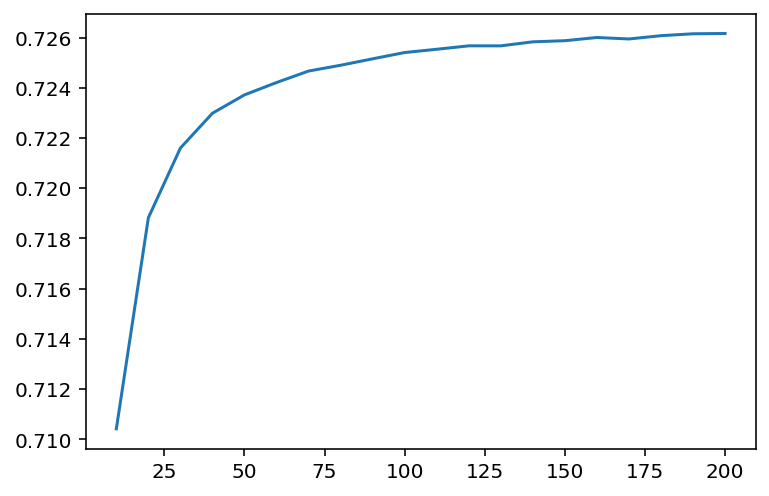

In [28]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

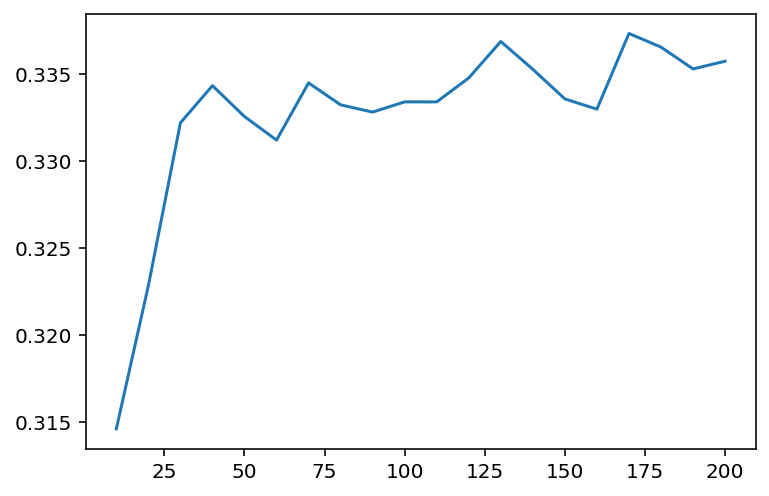

In [29]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [30]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 25.955678345765584
median_absolute_error: 3.727058823529802
r2_score: 0.3177291588641753


**3.4.2. Градиентный бустинг**

In [31]:
tuned_parameters

[{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
         140, 150, 160, 170, 180, 190, 200])}]

In [32]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
cv=ShuffleSplit(n_splits=10), scoring="r2",
return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

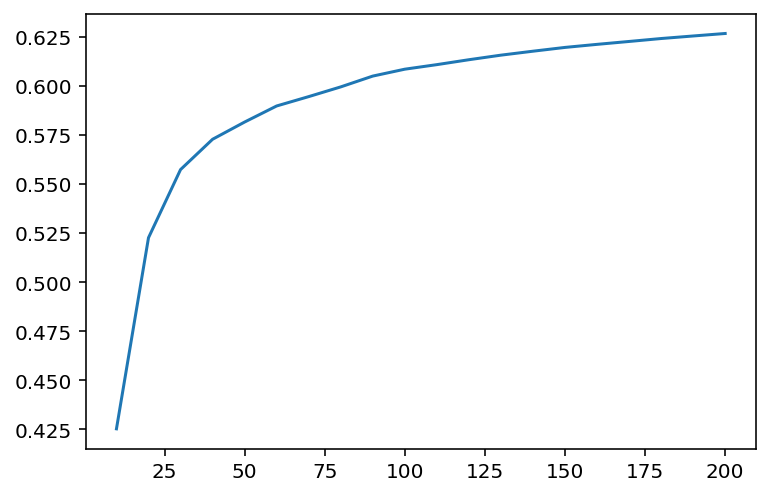

In [33]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

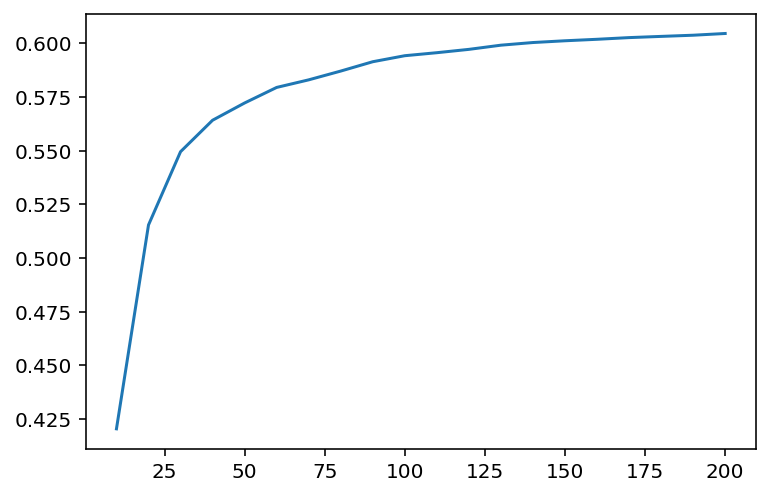

In [34]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [35]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 24.54115075254639
median_absolute_error: 12.836797097003473
r2_score: 0.5831520547363556
